In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import glob
from datetime import date
from datetime import datetime
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
df = pd.read_csv('gdrive/My Drive/EDA NY/csv/201901-bluebikes-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,371,2019-01-01 00:09:13.7980,2019-01-01 00:15:25.3360,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,3689,Subscriber,1987,1
1,264,2019-01-01 00:33:56.1820,2019-01-01 00:38:20.8800,117,Binney St / Sixth St,42.366162,-71.086883,189,Kendall T,42.362428,-71.084955,4142,Subscriber,1990,1
2,458,2019-01-01 00:41:54.6000,2019-01-01 00:49:33.2730,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,1628,Subscriber,1977,1
3,364,2019-01-01 00:43:32.5710,2019-01-01 00:49:37.4260,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945,334,Mass Ave at Hadley/Walden,42.391210,-71.122608,2969,Subscriber,1993,1
4,681,2019-01-01 00:49:56.4640,2019-01-01 01:01:17.7010,73,Harvard Square at Brattle St / Eliot St,42.373231,-71.120886,367,Vassal Lane at Tobin/VLUS,42.383932,-71.139613,3469,Subscriber,1979,2


In [ ]:
df.shape

(69872, 15)

In [ ]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [ ]:
data = df[['tripduration', 'starttime','start station id']]
data.head(5)

,tripduration,starttime,start station id
0,371,2019-01-01 00:09:13.7980,80
1,264,2019-01-01 00:33:56.1820,117
2,458,2019-01-01 00:41:54.6000,68
3,364,2019-01-01 00:43:32.5710,89
4,681,2019-01-01 00:49:56.4640,73


In [ ]:
def get_day_hour(starttime):
  starttime = datetime.strptime(starttime.split('.')[0], '%Y-%m-%d %H:%M:%S')
  #return int(f'{ "{:02d}".format(starttime.day) }{ "{:02d}".format(starttime.hour) }')
  return int(starttime.day)
data['day'] = data.starttime.apply(lambda x: get_day_hour(x))
data.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,tripduration,starttime,start station id,day
0,371,2019-01-01 00:09:13.7980,80,1
1,264,2019-01-01 00:33:56.1820,117,1
2,458,2019-01-01 00:41:54.6000,68,1
3,364,2019-01-01 00:43:32.5710,89,1
4,681,2019-01-01 00:49:56.4640,73,1


In [ ]:
data.groupby('day').size()

day
1     1305
2     2632
3     3005
4     3397
5      786
6     1631
7     2874
8     2981
9     3385
10    3332
11    2640
12    1236
13    1169
14    3008
15    3310
16    3555
17    3144
18    3292
19    1377
21     155
22     969
23    1814
24    1493
25    3019
26    1731
27    1913
28    3268
29    3244
30    2560
31    1647
dtype: int64

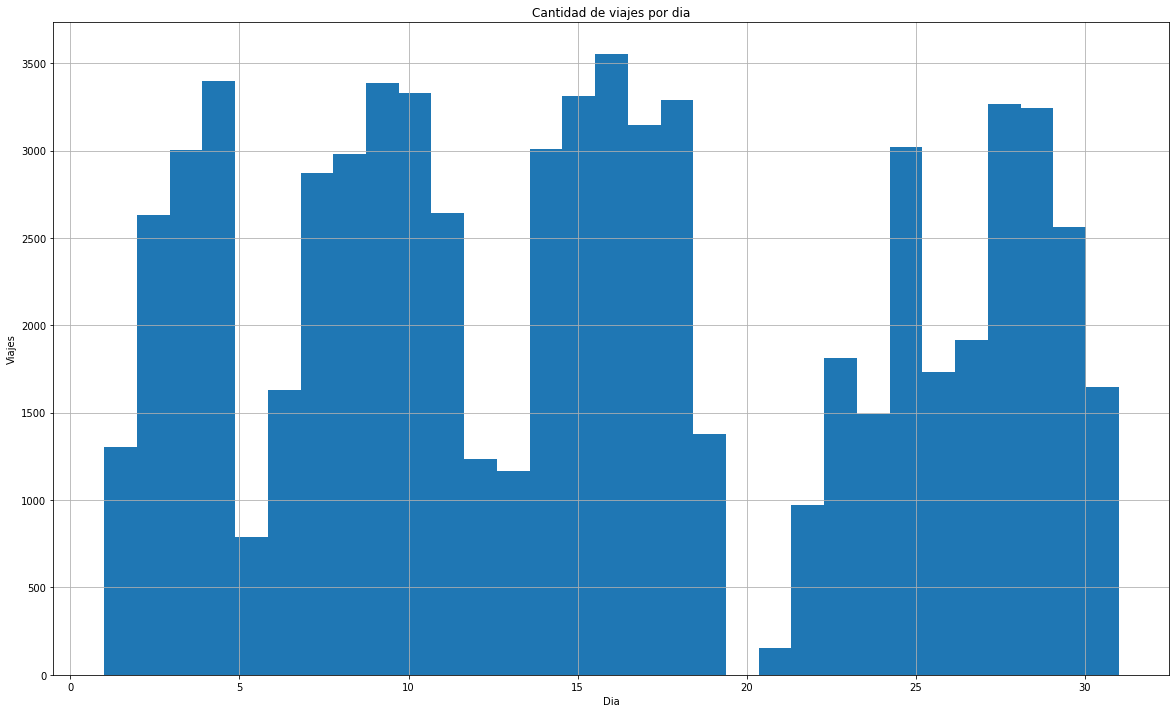

In [ ]:
data['day'].hist(figsize=(20,12), bins=31)
plt.title('Cantidad de viajes por dia')
plt.ylabel('Viajes')
plt.xlabel('Dia')
plt.show()

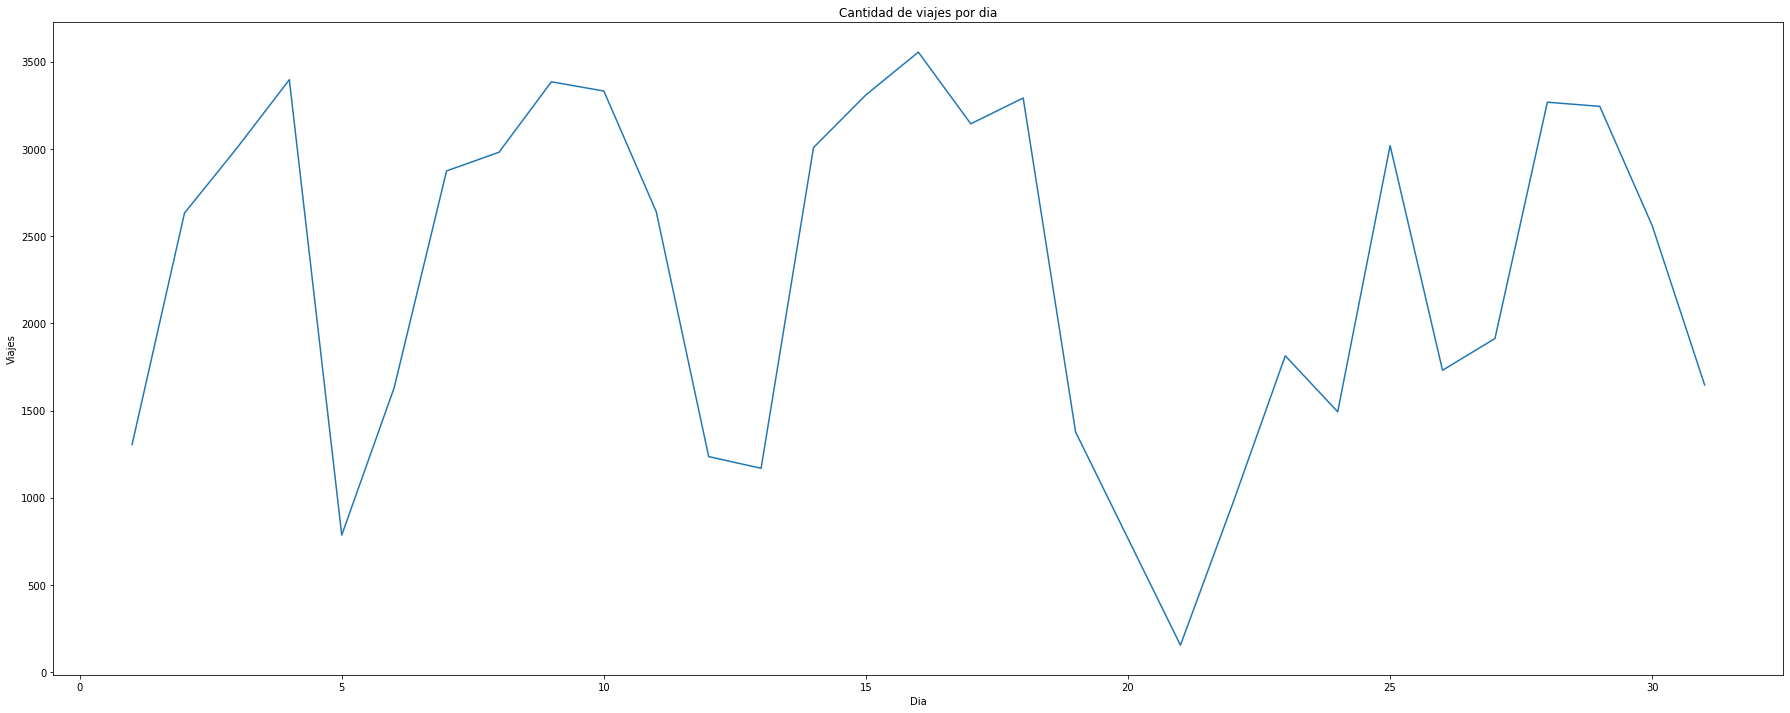

In [ ]:
ts = data.groupby('day').size()
ts.plot(figsize=(31,12))
plt.title('Cantidad de viajes por dia')
plt.ylabel('Viajes')
plt.xlabel('Dia')
plt.show()

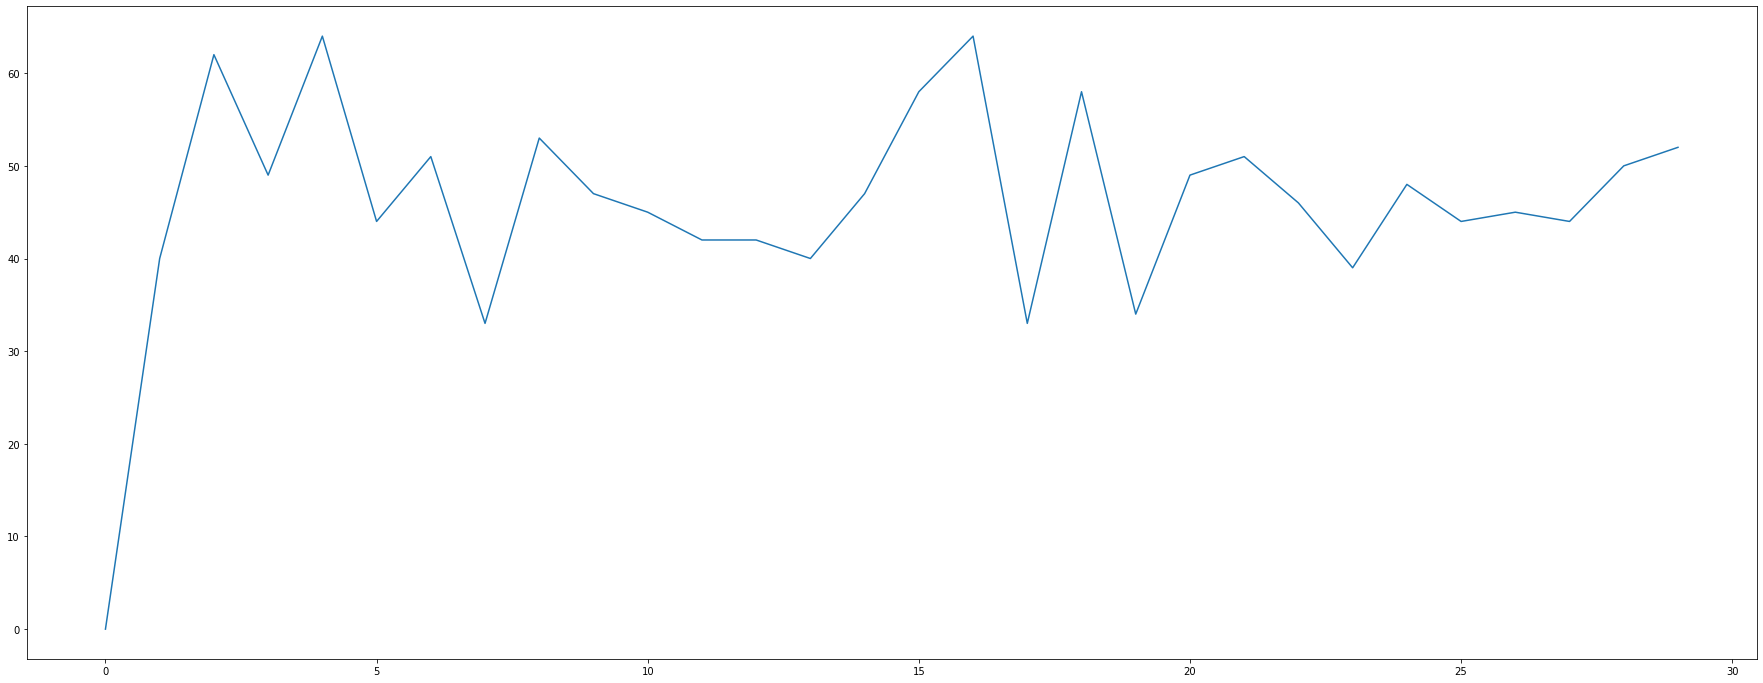

In [ ]:
airq = np.array([0,40,62,49,64,44,51,33,53,47,45,42,42,40,47,58,64,33,58,34,49,51,46,39,48,44,45,44,50,52])
#airq = np.array([0,40,62,49,64,44,51,33,53,47,45,42,42,40,47,58,64,33,58,43,34,49,51,46,39,48,44,45,44,50,52])
s = pd.Series(airq)
s.plot(figsize=(31,12))

In [ ]:
dataset = pd.DataFrame(data.groupby('day').size())
print(f'{len(dataset[0])} = {len(airq)}')
dataset['airq'] =airq
dataset.head()

30 = 30


,0,airq
day,,
1,1305,0
2,2632,40
3,3005,62
4,3397,49
5,786,64


<Figure size 432x288 with 0 Axes>

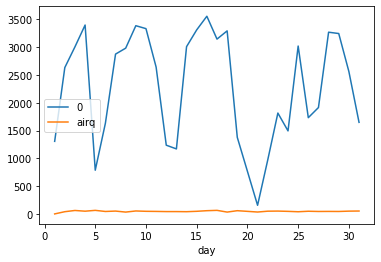

In [ ]:
df = pd.DataFrame(dataset)
plt.figure()
df.plot()